# Travaux dirigés

## Fichiers XML

Dans cet exercice, nous allons utiliser la librairie Python standard `xml` pour analyser un fichier fourni par un constructeur suite à la réalisation de son contrôle de qualité du TDM.

Un **fichier xml** est un type de fichier lisible qui permet de **stocker** et d'**échanger** des données **structurées**.

Un fichier XML est composé de **balises**, qui sont des mots entourés de chevrons (< et >). Les balises définissent le nom et le type des données qu'elles contiennent.

Un fichier XML peut aussi avoir des **attributs**, qui sont des paires de nom et de valeur associés à une balise.

Dans cet exemple, la balise `<personnes>` est la balise racine qui contient les informations de trois personnes. Chaque personne est représentée par une balise `<personne>` qui a un attribut id pour indiquer son identifiant. Les balises `<nom>` et `<age>` sont les balises enfants de la balise `<personne>` et contiennent le nom et l’âge de la personne.

```xml
<?xml version="1.0" encoding="UTF-8"?>
<personnes>
  <personne id="1">
    <nom> Alice </nom>
    <age> 25 </age>
  </personne>
  <personne id="2">
    <nom> Bob </nom>
    <age> 32 </age>
  </personne>
  <personne id="3">
    <nom> Charles </nom>
    <age> 28 </age>
  </personne>
</personnes>
```

In [141]:
st_xml = """<?xml version="1.0" encoding="UTF-8"?>
<personnes>
  <personne id="1">
    <nom> Alice </nom>
    <age> 25 </age>
  </personne>
  <personne id="2">
    <nom> Bob </nom>
    <age> 32 </age>
  </personne>
  <personne id="3">
    <nom> Charles </nom>
    <age> 28 </age>
  </personne>
</personnes>
"""

Pour parser le fichier xml, on peut utiliser la librairie standard xml de python.

Pour accéder à l'arborescence du fichier, on utilise le sous-module `ElementTree`

In [142]:
import xml.etree.ElementTree as ET
xml = ET.fromstring(st_xml)

La classe `Element` possède diverses méthodes et attributs (cf. aide en ligne ci-dessous)

In [146]:
help(ET.Element)

Help on class Element in module xml.etree.ElementTree:

class Element(builtins.object)
 |  Methods defined here:
 |  
 |  __copy__(self, /)
 |  
 |  __deepcopy__(self, memo, /)
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getstate__(self, /)
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self, /)
 |      Return len(self).
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __setitem__(self, key, value, /)
 |      Set self[key] to value.
 |  
 |  __setstate__(self, state, /)
 |  
 |  __sizeof__(self, /)
 |      Size of object in memory, in bytes.
 |  
 |  append(self, subelement, /)
 |  
 |  clear(self, /)
 |  
 |  extend(self, elements, /)
 |  
 |  find(self, /, path, namespaces=None)
 |  
 |  findall(self, /, path, namespaces=No

Par exemple, pour accéder aux informations situées après les balises, on utilise l'attribut `.text`. Voici un exemple qui parcoure l'arborescence du fichier et affiche les noms et les ages des personnes

In [177]:
for person in xml.findall('**'):
    if not person.attrib:
        print(person.tag, person.text)
    else:
        print(person.tag, person.text, person.attrib)

nom  Alice 
age  25 
nom  Bob 
age  32 
nom  Charles 
age  28 


### Analyse d'un CQ quotidien

Lors d'une procédure quotidienne de CQ d'une caméra Discovery NM/CT, un fichier xml est sauvegardé sur la caméra. Dans cet exercice, on se propose de récupérer les informations enregistrées par la gamma-caméra à l'aide de la bibliothèque standard xml de python.

#### Exercice 1

- ouvrez le fichier xml `report_0557.xml` situé dans le dossier `data`
- Analysez visuellement les informations présentes dans le fichier

In [230]:
tree = ET.parse('../data/report_0557.xml')
root = tree.getroot()

La boucle suivante permet de parcourir l'hiérarchie des balises présentes dans le fichier. 

- Changez le nombre `*` (`**`, `***`) dans la méthode `findall` pour vous donner une idée de la structure du fichier 

In [366]:
for el in root.findall('*'):
    if el.text and el.tail:
        print(el.tag,':', el.attrib, el.text, el.tail)
    else:
        print(el.tag,':', el.attrib)

detectorsInfo : {} 
 

generalInfo : {} 
 

detectorsGlobalParams : {'numOfInfos': '0'}


#### Exercice 2

On se propose d'extraire les valeurs du spectre en énergie contenu dans le fichier xml. Les informations contenues dans le fichier correspondent aux 2 détecteurs. Dans un premier temps, on ne considère que les informations relatives au détecteur 1 (indice 0).

- Déterminer la balise qui contient cette information
- Les informations de position du pic et le spectre sont situées dans 
    - des tags ?
    - des attributs ?
    - les champs texte ?
- Récupérer la position du pic photoélectrique pour le détecteur 1.
- Récupérer la résolution en énergie du pic photoélectrique pour le détecteur 1.
- Récupérer le spectre en énergie pour le détecteur 1.

In [245]:
res_en = root.find('detectorsInfo/Detector0/InfoIfc3').attrib

In [248]:
print(res_en['value'])

10.28


In [246]:
d1 = root.find('detectorsInfo/Detector0/InfoIfc7').attrib

In [249]:
print(d1['peak'])

122.372


#### Exercice 3
On souhaite afficher le spectre en énergie. 

- Quelles opérations faut-il réaliser pour exploiter le spectre extrait à l'étape précédente

In [271]:
import matplotlib.pyplot as plt

def get_pha_values(st_pha):
    """
    La chaine contient des valeurs numériques séparées par des virgules.
    On utilise la fonction split de la classe st pour séparer les valeurs
    On range le tout dans une liste
    """
    values = []
    for el in st_pha.split(","):
        values.append(float(el))
    return values

pha_values = get_pha_values(d1['phaData'])

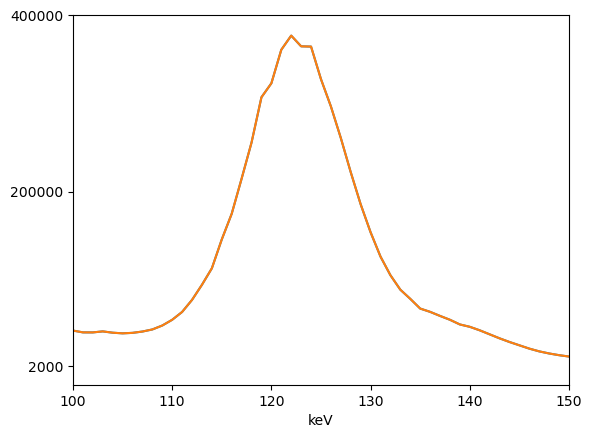

In [269]:
for p in pha:
    plt.plot(pha_values)
    plt.xlim(100, 150)
    plt.xlabel('keV')
    plt.yticks([2e3, 200e3, 400e3])

#### Exercice 4
On souhaite calculer la résolution en énergie à partir des données du spectre et la comparer à celle fournie par le constructeur dans le fichier xml.

Pour cela, on va utiliser la bibliothèque scientifique `scipy` qui permet notamment de faire des ajustements de courbes non linéaire. On va approximer la courbe autour de la valeur maximale du pic par une fonction gaussienne.

Pour rappel, l'équation est : $$\frac{1}{\sigma \sqrt{2\pi }}exp^{-\frac{(x-pos)^2}{2 \cdot\sigma^2}}$$

In [339]:
import numpy as np
from scipy.optimize import curve_fit

def gauss(x, a, pos, sigma):
    return a/sigma*np.exp(-(x-pos)**2/(2*sigma**2))

def fwhm(sigma):
    return 2*np.sqrt(2*np.log(2))*sigma

keV = [_ for _ in range(110, 135)]

popt, pcov = curve_fit(gauss, keV, pha_values[110:135], p0 = [1e7, 120, 50])

#### Exercice 5

- Afficher sur le même graphique le modèle gaussien avec le spectre
- Comparer la valeur de résolution en énergie fournie par le constructeur avec celle que vous avez estimé.

In [363]:
print(f' la résolution en énergie estimée : {fwhm(popt[2])/popt[1]:.2%}')
print(f' la résolution en énergie constructeur : {res_en["value"]}%')

 la résolution en énergie estimée : 11.14%
 la résolution en énergie constructeur : 10.28%


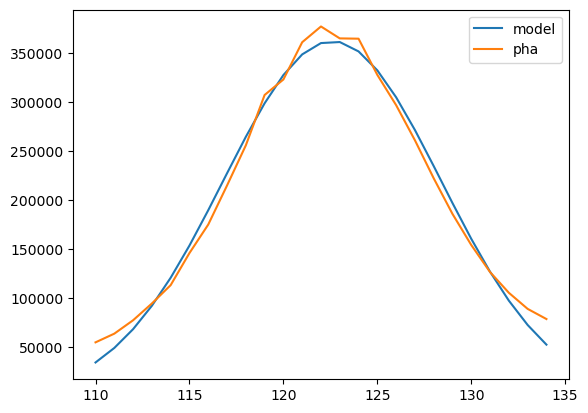

In [338]:
plt.plot(keV, gauss(keV, *popt), label='model')
plt.plot(keV, pha_values[110:135], label='pha')
plt.legend()
plt.show()

#### Exercice 6

- Tenter de faire la même approche avec les 2 détecteurs simultanément